# Grip At The Sparks Foundation Intenship

<h3>Task:1 Prediction using Supervised ML</h3>

**Name :- Jadeja Satyarajsinh H**

**Dataset : 2 variable (Hours, Score)**

**Algorithm : Simple Linear Regression**

# Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
df=pd.read_csv('Datasets\Task1.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#return hown many rows, columns& dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.**

In [4]:
#checking null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#shape of given dataset
df.shape

(25, 2)

# Arrange Data into Features Matrix and Target Vector

In [6]:
# Convert x column to numpy array
X = df.loc[:,['Hours']].values

In [7]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
# Convert Y column to numpy array
Y = df.loc[:,'Scores'].values

In [9]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Data Visulization

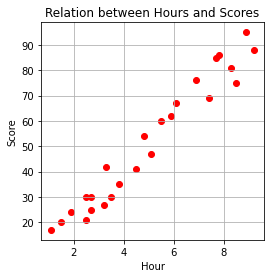

In [10]:
plt.figure(figsize=(4,4))
plt.scatter(df['Hours'], df['Scores'], color='red')
plt.title('Relation between Hours and Scores')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.grid(True)
plt.show()

We can clearly apply simple linear regression on our dataset


# Simple Linear Regression

Import the model 

In [11]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LinearRegression

## Train Test Split 

By measuring model performance on the test set, you can estimate how well your model is likely to perform on new data 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=0.2)

Make an instance of the Model.


This is a place where we can tune the hyperparameters of a model. In the case of linear regression, you can set **fit_intercept** to True or False depending on your needs. This is an important concept as more complex models have a lot more you can tune.

In [13]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

In [14]:
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
# Input needs to be two dimensional (reshape makes input two dimensional )
reg.predict(X[0].reshape(-1,1))

array([26.79480124])

In [16]:
reg.predict(X[0:10])

array([26.79480124, 52.56250809, 33.73226078, 86.25874013, 36.70545772,
       16.88414476, 93.19619966, 56.52677068, 84.27660883, 28.77693254])

# Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [17]:
score = reg.score(X_test, y_test)
print(score)

0.9454906892105356


`94.5% Accuracy`

**The equation of the line for the regression**

In [18]:
m=reg.coef_
m

array([9.91065648])

In [19]:
n=reg.intercept_
n

2.018160041434683

In [20]:
print("formula: y = {:.2f}x + {:.2f}".format(m[0], n) )

formula: y = 9.91x + 2.02


In [21]:
y_pred=reg.predict(X)
y_pred

array([26.79480124, 52.56250809, 33.73226078, 86.25874013, 36.70545772,
       16.88414476, 93.19619966, 56.52677068, 84.27660883, 28.77693254,
       78.33021494, 60.49103328, 46.6161142 , 34.72332643, 12.91988217,
       90.22300272, 26.79480124, 20.84840735, 62.47316457, 75.357018  ,
       28.77693254, 49.58931115, 39.67865467, 70.40168976, 79.32128059])

# Plotting the Best Fit Linear Regression Line in Red

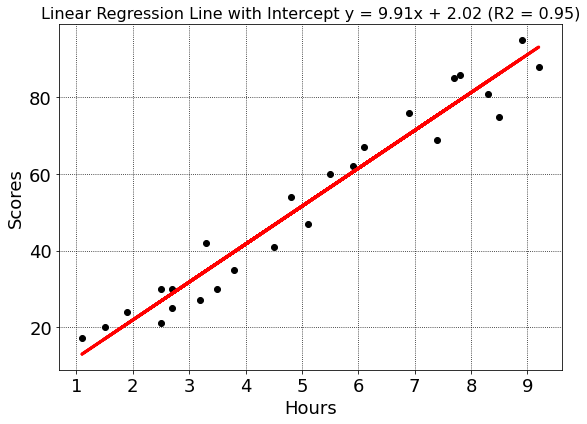

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6));

ax.scatter(X, Y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Hours', fontsize = 18)
ax.set_ylabel('Scores', fontsize = 18)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m[0], n, score), fontsize = 16 )
fig.tight_layout()

**What will be predicted score if a student studies for 9.25hrs/ day?**

In [23]:
pre=9.25
reg.predict(np.array([pre]).reshape(-1,1))

array([93.69173249])

# Evaluating the model

In [24]:
from sklearn import metrics

In [27]:
metrics.mean_squared_error(Y,y_pred)

29.03829976329509

In [28]:
metrics.mean_absolute_error(Y,y_pred)

4.986053347144891

`Conclusion:`

**Predicted scores on 9.25 hours study: 93.69173249**